<a href="https://colab.research.google.com/github/priyansh0312/Predicting-Productivity-with-Regression/blob/master/Productivity_Prediction_using_Random_Forest_Regreesion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [3]:
df = pd.read_csv("garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Here date has been taken as object type.
We will use parse_date in the read_csv method to read the date column as datetime64[ns]

In [5]:
df = pd.read_csv("garments_worker_productivity.csv", parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

## Checking and filling for Null Values

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
# Checking for Null values
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

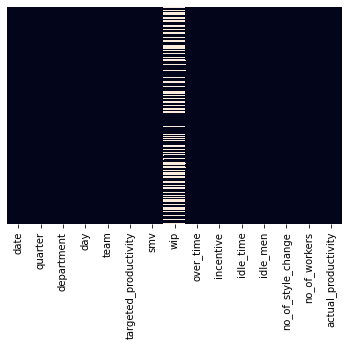

In [8]:
# visualising Null values
sns.heatmap(data = df.isnull(), yticklabels= False, cbar = False)

Now we will try to fill the null values in wip based on the average value of each department

In [9]:
# fixing the error in department
df['department'] = df['department'].apply(lambda x: 'finishing' if x == 
                                          ('finishing ' or 'finishing' ) else 'sewing')

In [11]:
# checking groupwise mean for different departments for wip values
df.groupby(df.department).mean()['wip']

department
finishing            NaN
sewing       1190.465991
Name: wip, dtype: float64

In [12]:
# checking count of each department
df.department.value_counts()

sewing       940
finishing    257
Name: department, dtype: int64

Since wip is not usefull as a feature and has many null values, filing null in wip won't make any difference. Hence we remove the wip column

In [13]:
df.drop('wip', axis = 1, inplace = True)

In [14]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

Now there are no null values in df

## Feature Selection

We will be using Sequential feature selector

In [15]:
# dropping date column since it is of no use
df.drop('date', axis = 1, inplace = True)
df2 = df.copy()

In [16]:
# encoding the categorical features into dummy variables
df2 = pd.get_dummies(df2, drop_first=True)

In [17]:
df2.head()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sewing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,0,0,0,0,1,0,0,1,0,0
1,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,0,0,0,0,0,0,0,1,0,0
2,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0,0,0,0,1,0,0,1,0,0
3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0,0,0,0,1,0,0,1,0,0
4,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,0,0,0,0,1,0,0,1,0,0


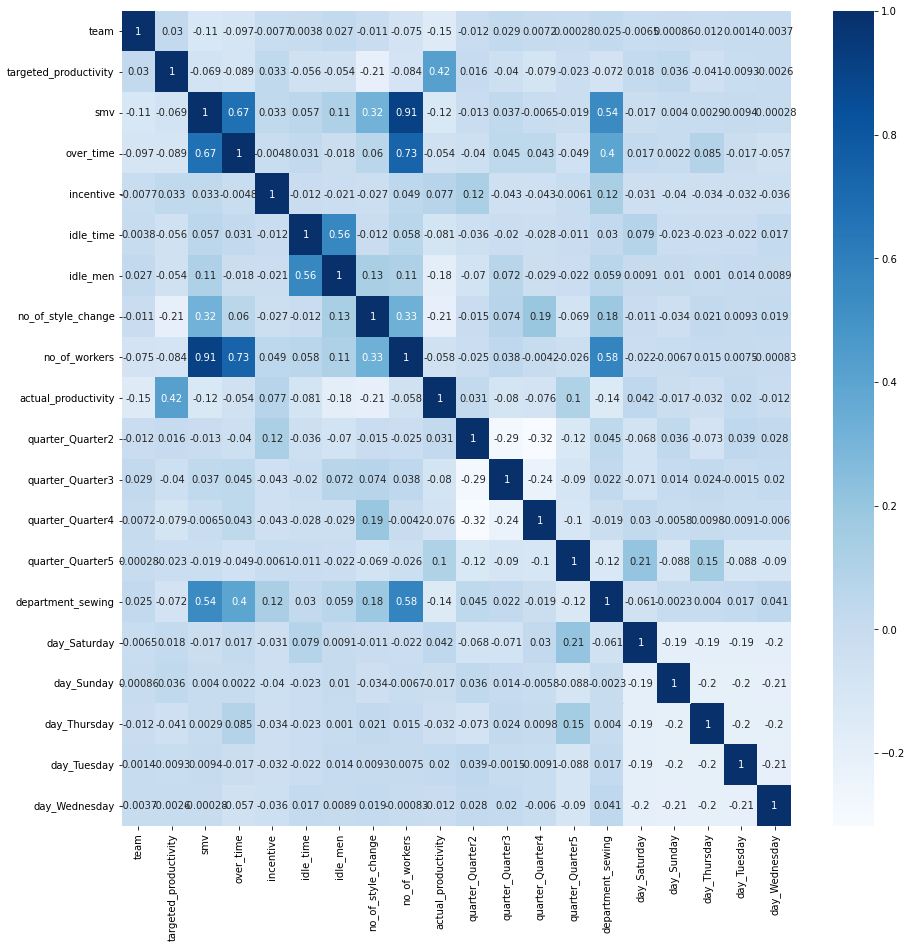

In [18]:
# checking the correlation among the variables
plt.figure(figsize = (15,15))
sns.heatmap(df2.corr(), annot = True, cmap = "Blues")

In [19]:
# Selecting Important features using Sequential feature Selector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
X = df2.drop('actual_productivity', axis = 1)
y = df2['actual_productivity']

# columns/features of the dataset
features = X.columns

In [21]:
# make the feature object and then fit the data to it
sfs = SequentialFeatureSelector(reg, n_features_to_select=5, direction='backward')
sfs.fit(X, y)

In [ ]:
# Get the selected features
features[sfs.get_support()]

Index(['team', 'targeted_productivity', 'smv', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'department_sewing'],
      dtype='object')

In [22]:
# now we can transform X to be only the selected features with .tranform() method
X_selected = df2[['team', 'targeted_productivity', 'smv', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'department_sewing']]

In [24]:
X_selected.head()

,team,targeted_productivity,smv,idle_men,no_of_style_change,no_of_workers,department_sewing
0,8,0.80,26.16,0,0,59.0,1
1,1,0.75,3.94,0,0,8.0,0
2,11,0.80,11.41,0,0,30.5,1
3,12,0.80,11.41,0,0,30.5,1
4,6,0.80,25.90,0,0,56.0,1


In [25]:
y

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64

Now we will train the model with this X_selected and y

## Feature Scaling

In [26]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3, random_state = 101)

In [27]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, :6] = sc.fit_transform(X_train.iloc[:, :6])
X_test.iloc[:, :6] = sc.transform(X_test.iloc[:, :6])

In [28]:
X_train.head()

,team,targeted_productivity,smv,idle_men,no_of_style_change,no_of_workers,department_sewing
475,-0.445122,-2.363292,0.558322,-0.12712,-0.355451,1.084278,1
9,-1.607579,0.208710,1.232953,-0.12712,-0.355451,1.061775,1
180,-0.154508,0.723111,-0.309723,-0.12712,-0.355451,-0.153410,1
306,-0.735737,-0.305690,0.718419,-0.12712,-0.355451,1.016768,1
1119,0.717335,0.208710,0.373237,-0.12712,-0.355451,0.814237,1


In [29]:
X_test.head()

,team,targeted_productivity,smv,idle_men,no_of_style_change,no_of_workers,department_sewing
980,-0.735737,-2.363292,1.101543,-0.12712,4.221669,1.084278,1
99,1.007949,0.208710,1.232953,-0.12712,-0.355451,1.106782,1
740,-0.735737,-0.305690,1.419888,-0.12712,1.933109,1.129285,1
1138,-0.735737,0.208710,-1.001012,-0.12712,-0.355451,-1.166065,1
595,0.136106,-0.305690,0.879443,-0.12712,-0.355451,0.994265,1


## Model Training and Evaluation

In [42]:
# Polynomial Regression
reg = RandomForestRegressor().fit(X_train, y_train)

## Evaluating Model Performance

In [43]:
predictions = reg.predict(X_test)

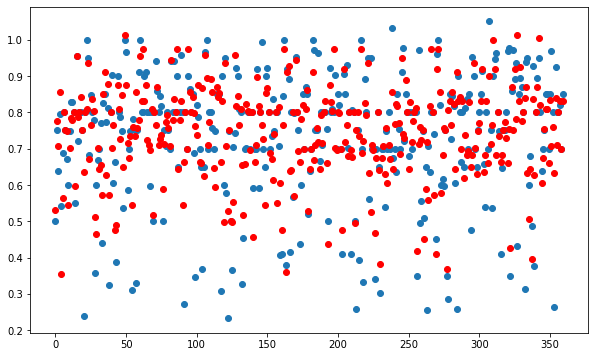

In [44]:
plt.figure(figsize = (10, 6))
plt.scatter(np.arange(0, len(y_test)), y_test)
plt.scatter(np.arange(0, len(predictions)), predictions, color = 'red')

As we can see from the scatterplot, the predictions are quite similar to the actual values. Let us evaluate the performance metrices

In [45]:
# plotting the predicted results and the actual results
pred_df = pd.concat([pd.DataFrame(predictions), pd.DataFrame(y_test)], axis=1)
pred_df.columns = ['pred', 'actual']
pred_df['error'] = (pred_df['actual'] - pred_df['pred']) ** 2

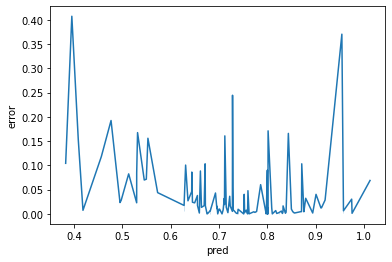

In [46]:
sns.lineplot(data=pred_df, x='pred', y='error')

(-0.75, 0.75)

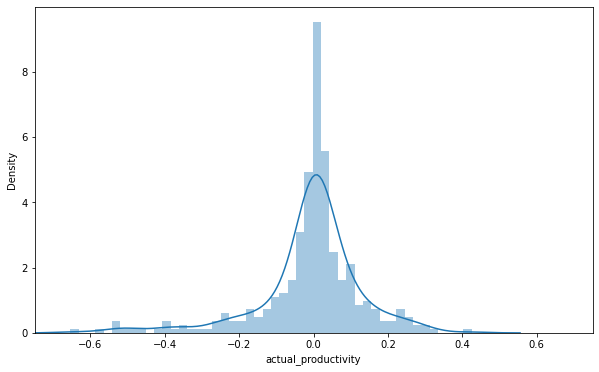

In [47]:
# plotting the distribution of residual error
plt.figure(figsize = (10,6))
sns.distplot(y_test - predictions)
plt.xlim(-0.75, 0.75)

As we can see, the residuals are normally distributed.

## Evaluation Metrics

In [48]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(predictions, y_test)
AdjR2 = 1-(1-R2)*(1197-1)/(1197-7-1)

print('MAE   = ', MAE)
print('MSE   = ', MSE)
print('RMSE  = ', RMSE)
print('R2    =', R2 )
print('AdjR2 =', AdjR2)

MAE   =  0.08690900181420147
MSE   =  0.019900260105269005
RMSE  =  0.14106828171232896
R2    = -0.21220706641323228
AdjR2 = -0.21934369338118231
